In [45]:
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split

data = load_breast_cancer()
X = data.data
y = data.target

X = scale(X)

X_trainval, X_test, y_trainval, y_test = train_test_split(X, y)

len(X_trainval), len(X_test)

X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval)

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
print('Validation: {0:.3f}'.format(knn.score(X_val, y_val)))
print('Test: {0:.3f}'.format(knn.score(X_test, y_test)))

Validation: 0.963
Test: 0.937


In [46]:
import numpy as np

In [47]:
val = []
test = []
for i in range(1000):
    rng = np.random.RandomState(i)
    noise = rng.normal(loc=0, scale=.1, size=X_train.shape)
    knn = KNeighborsClassifier(n_neighbors=5)
    knn.fit(X_train+noise, y_train)
    val.append(knn.score(X_val, y_val))
    test.append(knn.score(X_test, y_test))
    
print('Valition:{0:.3f}'.format(np.max(val)))
print('Test:{0:.3f}'.format(np.max(test)))

Valition:0.972
Test:0.951


In [48]:
val_scores = []
neigbors = range(1,15,2)
X_trainval, X_test, y_trainval, y_test = train_test_split(X, y)
X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval)
for i in neigbors:
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    val_scores.append(knn.score(X_val, y_val))

print('Best valition score:{0:.3f}'.format(np.max(val_scores)))
best_neigbors = neigbors[np.argmax(val_scores)]
print('best n_neigbors:{0}'.format(best_neigbors))

knn = KNeighborsClassifier(n_neighbors=best_neigbors)
knn.fit(X_trainval, y_trainval)
print('Test:{0:.3f}'.format(knn.score(X_test, y_test)))

Best valition score:0.981
best n_neigbors:3
Test:0.958


In [49]:
from sklearn.model_selection import cross_val_score

X_train, X_test, y_train, y_test = train_test_split(X, y)
neigbors = range(1,15,2)
cv_scores = []
for i in neigbors:
    knn = KNeighborsClassifier(n_neighbors=i)
    scores = cross_val_score(knn, X_train, y_train, cv=10)
    cv_scores.append(np.mean(scores))
print('Best cross-valition score:{0:.3f}'.format(np.max(cv_scores)))
best_neigbors = neigbors[np.argmax(cv_scores)]
print('best n_neigbors:{0}'.format(best_neigbors))

knn = KNeighborsClassifier(n_neighbors=best_neigbors)
knn.fit(X_train, y_train)
print('Test:{0:.3f}'.format(knn.score(X_test, y_test)))

Best cross-valition score:0.976
best n_neigbors:3
Test:0.944


In [50]:
from sklearn.model_selection import GridSearchCV

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y)# stratify 保证train, test分布相同
neigbors = range(1,15,2)

grid = GridSearchCV(KNeighborsClassifier(), param_grid={'n_neighbors':neigbors},  cv=10, return_train_score=True)
grid.fit(X_train, y_train)
print('Best mean crossvalidation score {0:.3f}'.format(grid.best_score_))
print('Best n_neighbors {0}'.format(grid.best_params_))
grid.score(X_test, y_test)

Best mean crossvalidation score 0.965
Best n_neighbors {'n_neighbors': 7}


0.9440559440559441

In [51]:
import pandas as pd

In [52]:
results = pd.DataFrame(grid.cv_results_)

In [53]:
results.columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_n_neighbors', 'params', 'split0_test_score', 'split1_test_score',
       'split2_test_score', 'split3_test_score', 'split4_test_score',
       'split5_test_score', 'split6_test_score', 'split7_test_score',
       'split8_test_score', 'split9_test_score', 'mean_test_score',
       'std_test_score', 'rank_test_score', 'split0_train_score',
       'split1_train_score', 'split2_train_score', 'split3_train_score',
       'split4_train_score', 'split5_train_score', 'split6_train_score',
       'split7_train_score', 'split8_train_score', 'split9_train_score',
       'mean_train_score', 'std_train_score'],
      dtype='object')

In [54]:
results.params

0     {'n_neighbors': 1}
1     {'n_neighbors': 3}
2     {'n_neighbors': 5}
3     {'n_neighbors': 7}
4     {'n_neighbors': 9}
5    {'n_neighbors': 11}
6    {'n_neighbors': 13}
Name: params, dtype: object

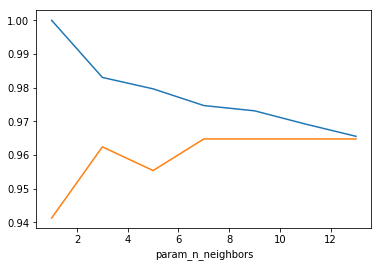

In [55]:
%matplotlib inline
ret = results.set_index('param_n_neighbors')
ret.mean_train_score.plot()
ret.mean_test_score.plot()

* KFold#标准k子集划分

* KFold#按类别k子集划分

* TimeSeriesSplit#时间序列划分

* ShuffleSplit#随机划分

* StratifiedKFold#k子集按每个类固定比例划分

* StratifiedShuffleSplit#k子集按每个类固定比例随机划分

In [56]:
from sklearn.model_selection import KFold, StratifiedKFold, ShuffleSplit, RepeatedStratifiedKFold
kfold = KFold(n_splits=5)
skfold = StratifiedKFold(n_splits=5, shuffle=True)
ss = ShuffleSplit(n_splits=20, train_size=.4, test_size=.3)
rs = RepeatedStratifiedKFold(n_splits=5, n_repeats=10)
data = load_breast_cancer()
X = data.data
y = data.target

X = scale(X)
print('KFold:\n{0}'.format(cross_val_score(KNeighborsClassifier(), X, y, cv=kfold)))
print('StratifiedKFold:\n{0}'.format(cross_val_score(KNeighborsClassifier(), X, y, cv=skfold)))
print('ShuffleSplit:\n{0}'.format(cross_val_score(KNeighborsClassifier(), X, y, cv=ss)))
print('RepeatedStratifiedKFold:\n{0}'.format(cross_val_score(KNeighborsClassifier(), X, y, cv=rs)))

KFold:
[0.92982456 0.95614035 0.96491228 0.98245614 0.96460177]
StratifiedKFold:
[0.96521739 0.96521739 0.95575221 0.95575221 0.99115044]
ShuffleSplit:
[0.94152047 0.94152047 0.95906433 0.95906433 0.95906433 0.96491228
 0.94152047 0.91812865 0.97660819 0.95321637 0.95321637 0.97076023
 0.97076023 0.95321637 0.93567251 0.97076023 0.94152047 0.93567251
 0.96491228 0.96491228]
RepeatedStratifiedKFold:
[0.93913043 0.96521739 0.98230088 0.95575221 0.97345133 0.93913043
 0.97391304 0.99115044 0.97345133 0.92920354 0.99130435 0.97391304
 0.95575221 0.97345133 0.96460177 0.9826087  0.97391304 0.95575221
 0.96460177 0.97345133 0.94782609 0.96521739 0.95575221 0.99115044
 0.97345133 0.95652174 1.         0.92920354 0.98230088 0.96460177
 0.95652174 0.97391304 0.95575221 0.96460177 0.97345133 0.97391304
 0.95652174 0.97345133 0.98230088 0.9380531  0.95652174 0.99130435
 0.96460177 0.96460177 0.96460177 0.9826087  0.95652174 0.97345133
 0.97345133 0.94690265]


In [57]:
from sklearn.model_selection import cross_validate

In [62]:
scores = cross_validate(KNeighborsClassifier(), X, y, cv=5, return_train_score=True, scoring=['accuracy', 'roc_auc'])

In [63]:
pd.DataFrame(scores)

,fit_time,score_time,test_accuracy,train_accuracy,test_roc_auc,train_roc_auc
0,0.001002,0.010055,0.965217,0.980176,0.996609,0.997654
1,0.001002,0.008552,0.956522,0.975771,0.983689,0.998650
2,0.001002,0.008049,0.982301,0.971491,0.999329,0.996977
3,0.000501,0.008021,0.955752,0.978070,0.984071,0.997820
4,0.000501,0.008022,0.964602,0.978070,0.994634,0.998026
